In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [16]:
df=pd.read_csv("ratings_Electronics (1).csv",names=['userId', 'productId','Rating','timestamp'])

In [17]:
df

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [18]:
df = df.drop(['timestamp'], axis=1)

In [19]:
popular = pd.DataFrame(df.groupby('productId')['Rating'].count())
top = popular.sort_values('Rating', ascending=False)
top.head(10)

,Rating
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
B003ELYQGG,11617
B003ES5ZUU,10276
B007R5YDYA,9907
B00622AG6S,9823


<Axes: xlabel='productId'>

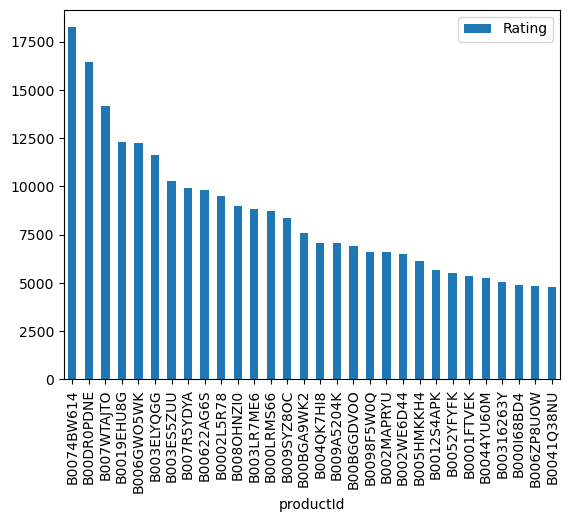

In [20]:
top.head(30).plot(kind = "bar")

In [21]:
df_sub = df.head(10000)

In [22]:
util_matrix = df_sub.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
util_matrix.head()

productId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0402564TCEO67AUZFJO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
util_matrix.shape

(9826, 1305)

In [24]:
transposed_matrix = util_matrix.T
transposed_matrix.head()

userId,A00766851QZZUBOVF4JFT,A01255851ZO1U93P8RKGE,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0402564TCEO67AUZFJO,A04256643L1ZMT75HVD2P,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A07865442XT0VEAVPSGX1,...,AZV9WA9MNT0FB,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXFQVG0PS3V1,AZYNQZ94U6VDB,AZYTSU42BZ7TP,AZZ77XYX8O2WE,AZZGUU97OHUF1,AZZMV5VT9W7Y8
productId,,,,,,,,,,,,,,,,,,,,,
0132793040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0321732944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0439886341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0511189877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
0528881469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
transposed_matrix.shape

(1305, 9826)

In [26]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(transposed_matrix)
decomposed_matrix.shape

(1305, 10)

In [28]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1305, 1305)

In [29]:
transposed_matrix.index[99]

'1616833734'

In [30]:
i = "1616833734"

product_names = list(transposed_matrix.index)
product_ID = product_names.index(i)
product_ID

99

In [31]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1305,)

In [32]:
Recommend = list(transposed_matrix.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['3778939742',
 '6001443505',
 '6010099161',
 '9875961221',
 '9966210423',
 '9966284826',
 '9966607463',
 '9981711780',
 '9981739588',
 '9983036665']

In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [36]:
product_descriptions = pd.read_csv('Amazon.csv')
product_descriptions.shape

(1465, 16)

In [37]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

(1463, 16)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [38]:
col = ["product_id","about_product"]
product_descriptions = product_descriptions[col]

In [39]:
product_descriptions

,product_id,about_product
0,B002PD61Y4,Connects your computer to a high-speed wireles...
1,B002PD61Y4,Connects your computer to a high-speed wireles...
2,B002SZEOLG,150 Mbps Wi-Fi —— Exceptional wireless speed u...
3,B003B00484,Duracell Rechargeable AAA 750mAh batteries sta...
4,B003L62T7W,"A comfortable, ambidextrous shape feels good i..."
...,...,...
1459,B0BPBXNQQT,Fast Heating :- Ceramic heating element create...
1460,B0BPCJM7TB,The battery operated milk frother is easy to c...
1461,B0BPJBTB3F,Khaitan Orfin Fan heater for Home and kitchen|...
1462,B0BQ3K23Y1,-Make delicious milk foam creamer for your dri...


In [40]:
import re
def clean(text):
    res = re.sub("[^A-Za-z]"," ",text)
    res = res.strip().lower()
    return res
product_descriptions["about_product"] = product_descriptions['about_product'].apply(clean)

In [41]:
product_descriptions

,product_id,about_product
0,B002PD61Y4,connects your computer to a high speed wireles...
1,B002PD61Y4,connects your computer to a high speed wireles...
2,B002SZEOLG,mbps wi fi exceptional wireless speed up to...
3,B003B00484,duracell rechargeable aaa mah batteries sta...
4,B003L62T7W,a comfortable ambidextrous shape feels good i...
...,...,...
1459,B0BPBXNQQT,fast heating ceramic heating element create...
1460,B0BPCJM7TB,the battery operated milk frother is easy to c...
1461,B0BPJBTB3F,khaitan orfin fan heater for home and kitchen ...
1462,B0BQ3K23Y1,make delicious milk foam creamer for your drin...


In [42]:
product_descriptions1 = product_descriptions.head(500)

product_descriptions1["about_product"].head(10)

0    connects your computer to a high speed wireles...
1    connects your computer to a high speed wireles...
2    mbps wi fi    exceptional wireless speed up to...
3    duracell rechargeable aaa    mah batteries sta...
4    a comfortable  ambidextrous shape feels good i...
5    you can surf the web with more comfort and eas...
6    ultra compact and portable usb flash drive cap...
7    enables easy installation of audio components ...
8    enables easy installation of audio components ...
9    feet of    gauge speaker wire connects audio s...
Name: about_product, dtype: object

In [43]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["about_product"])
X1

<500x4369 sparse matrix of type '<class 'numpy.float64'>'
	with 25387 stored elements in Compressed Sparse Row format>

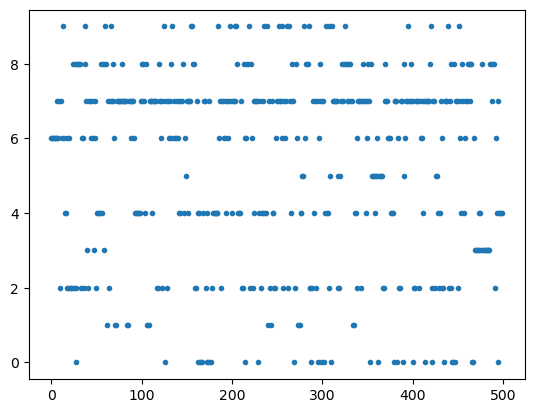

In [44]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [45]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [46]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

KMeans(max_iter=100, n_clusters=10, n_init=1)

Top terms per cluster:
Cluster 0:
 cm
 voltage
 power
 automatic
 induction
 unit
 watts
 wattage
 content
 indian
Cluster 1:
 usb
 type
 cable
 charging
 charge
 devices
 speed
 data
 enabled
 connector
Cluster 2:
 mm
 notebook
 ear
 sound
 microphone
 bass
 jack
 audio
 hours
 db
Cluster 3:
 warranty
 year
 power
 watts
 room
 cord
 heat
 product
 volts
 heater
Cluster 4:
 water
 heating
 element
 safety
 cord
 tank
 kettle
 power
 steam
 cms
Cluster 5:
 wireless
 mouse
 wpa
 ghz
 windows
 battery
 keyboard
 usb
 batteries
 wi
Cluster 6:
 jar
 motor
 steel
 stainless
 blade
 material
 blades
 lid
 grinding
 warranty
Cluster 7:
 hdmi
 cable
 video
 tv
 supports
 ethernet
 audio
 male
 xbox
 ps
Cluster 8:
 ink
 laptop
 inch
 color
 writing
 easy
 quality
 compatible
 size
 colour
Cluster 9:
 iphone
 plus
 ipad
 charging
 ipod
 sync
 nylon
 durability
 charge
 mini


In [47]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [48]:
show_recommendations("water heater")

Cluster 4:
 water
 heating
 element
 safety
 cord
 tank
 kettle
 power
 steam
 cms


In [49]:
show_recommendations("sound amplifier audio boost for sound booster")

Cluster 2:
 mm
 notebook
 ear
 sound
 microphone
 bass
 jack
 audio
 hours
 db


In [50]:
show_recommendations("iphone 15")

Cluster 8:
 ink
 laptop
 inch
 color
 writing
 easy
 quality
 compatible
 size
 colour


In [51]:
show_recommendations("water")

Cluster 4:
 water
 heating
 element
 safety
 cord
 tank
 kettle
 power
 steam
 cms


In [ ]:
#https://www.kaggle.com/code/arvio25/recommendation-system-for-amazon-products/notebook